In [ ]:
# SPDX-FileCopyrightText: 2023 Machine-Learning-OER-Collection
# SPDX-License-Identifier: CC-BY-4.0

# Example Code for an Exploratory Data Analysis (EDA)

Here is the scenario: You are a Data Scientist at a large car dealership (yes, a quick web search will show you the initial source of the data set we'll use in this tutorial). Your task is to keep the company from pouring money down the drain by predicting whether the vehicle your bosses bought at an auction is a **kick** (bad buy).

You will use a classifier to solve this task but before you can start training the model, you need to do some data analysis.

Exploratory data analysis (EDA) is a very effective way to gain insight into data. EDA is an essential step in data analysis, not just for classification tasks. It helps to understand the data set, identify patterns, and detect outliers. EDA is also used to prepare the input for the machine learning model.

##### The data set:

We will use the [kick data set](https://api.openml.org/d/41162) from [OpenML](https://www.openml.org/).
To ensure reuse, a dataset with a CC0 license was selected.

The dataset contains 33 columns, i.e., variables about the manufacturer, car model, age of the car or price. In the process of analysis, individual variables are removed for various reasons, which are explained in the corresponding step. 

**Background**

One of the biggest challenges a car dealership faces when purchasing a used vehicle at an auction is the potential risk that the vehicle might have severe issues preventing it from being sold to buyers. The industry refers to these unfortunate purchases as **kicks** or **lemons**.

Lemons are often the result of tampered odometers, mechanical problems that the dealer cannot fix, problems getting the title from the seller, or some other unforeseen problem. Lemons can be very costly to dealers after transportation costs, throwaway repairs, and market loss when reselling the vehicle.

To give an example, a vehicle purchased for the market price of \$7,000 seems like a good deal. After purchasing the vehicle, the mechanics ascertain that a part of the vehicle was improperly repaired by installing a part from a similar vehicle. This reveals weaknesses in the welds. Repairing the weak spots will cost a considerable amount of money. No one will pay the \$7,000 purchase price if the vehicle has such problems. So it's a losing business. 

The data set refers to lemons as kicks. Hence in this context, the term **kick** will be used. 
Identifying vehicles with a higher likelihood of being kicked, in this data set the target variable _IsBadBuy_ provides valuable assistance to dealerships aiming to offer their customers the best inventory choices.

Your challenge is to predict whether the vehicle bought at the auction is a **kick** (bad buy).

**Classification**

Classification aims to represent the distribution of class labels by looking at labeled data and predictor features. The ultimate goal is to build a model that can predict the class of a new or unknown case. The model is trained on a training data set with known class labels. The model is then used to predict the class of unknown cases. Classification can be used to predict binary or multi-class problems.

The data set is a binary classification challenge with 72,983 observations and 32 features. The target variable 'IsBadBuy' consists of two classes: 0 (not a kick) and 1 (a kick).
The features consist of information about every single vehicle, such as the age (VehicleAge), model (Model), or odometer (VehOdo).

***Reference***:

Example code for an EDA by julia from the repo [Machine-Learning-OER-Basics](https://github.com/Machine-Learning-OER-Collection/Machine-Learning-OER-Basics) is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

__________

Steps:

1. Preparation of the data set:
    - Read in the data set
    Exploratory data analysis (EDA):
    - Clean the data set
        - Check for missing values
        - Handle missing values
        - Handle outliers
     - Visualize feature relations

#### Used libraries in the code:
* [pandas](https://pandas.pydata.org/docs/index.html#) for data analyzing
* [seaborn](https://seaborn.pydata.org/) for statistical data visualization
* [matplotlib](https://matplotlib.org/) for data visualization

________________________________________


#### First step - Exploratory data analysis (EDA)

**Read in the data set**

One way is to download the data set and read it in as a pandas DataFrame. An alternative is to stream the data set via the OpenML API, for more information, [see here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html). The data set is stored in a comma-separated values (.csv) file. The function read_csv() from pandas reads the csv file and stores it in a DataFrame. 

Check for missing values: This example data set uses question marks (?) for missing values. The parameter na_values converts the question marks to the format NaN (not a number), which pandas can detect.

In [2]:
import pandas as pd

df = pd.read_csv('kick.csv', na_values='?')

In [3]:
print(f'\n Summary of data set: \n')
df.info()


 Summary of data set: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   'IsBadBuy'                        72983 non-null  int64  
 1   'PurchDate'                       72983 non-null  int64  
 2   'Auction'                         72983 non-null  object 
 3   'VehYear'                         72983 non-null  int64  
 4   'VehicleAge'                      72983 non-null  int64  
 5   'Make'                            72983 non-null  object 
 6   'Model'                           72983 non-null  object 
 7   'Trim'                            70623 non-null  object 
 8   'SubModel'                        72975 non-null  object 
 9   'Color'                           72975 non-null  object 
 10  'Transmission'                    72974 non-null  object 
 11  'WheelTypeID'                     69814 no

The Dtypes of the columns are automatically detected by pandas. This data set contains int64 (integer), object (string), and float64 (float, decimal).

The categorical features in this data set are:

Feature | Definition
--- | --- 
Auction | Auction at which the vehicle was purchased 
Make | Manufacturer 
Model | Model of the vehicle
Trim | Trim level: base model up to all features included
SubModel | Submodel of the vehicle
Color | Color of the vehicle
Transmission | Automatic or Manual
WheelType | Alloy or Covers
Nationality | Country of manufacturer
Size | SUV, Large Truck, etc. 
TopThreeAmericanName | Manufacturer from the US
PRIMEUNIT | Has a higher demand than a standard purchase, yes or no
AUCGUART    | Guarantee level provided by auction company
VNST | US State where car was purchased

The numerical features are:

Feature | Definition
--- | ---
PurchDate | Date of purchase at auction
VehYear | Year manufactured
VehicleAge | Age of vehicle since manufactured
WheelTypeID | Type ID for the wheel type
VehOdo | Odometer reading
MMRAcquisitionAuctionAveragePrice | Acquisition price for this vehicle in average condition at time of purchase
MMRAcquisitionAuctionCleanPrice | Acquisition price for this vehicle in the above Average condition at time of purchase
MMRAcquisitionRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition at time of purchase
MMRAcquisitonRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition at time of purchase
MMRCurrentAuctionAveragePrice | Acquisition price for this vehicle in average condition as of current day
MMRCurrentAuctionCleanPrice | Acquisition price for this vehicle in the above condition as of current day
MMRCurrentRetailAveragePrice | Acquisition price for this vehicle in the retail market in average condition as of current day
MMRCurrentRetailCleanPrice | Acquisition price for this vehicle in the retail market in above average condition as of current day
BYRNO | Unique number assigned to the actual buyer who bought the car at auction
VNZIP1 | Zipcode where the car was purchased
VehBCost | Acquisition cost paid for vehicle at time of purchase
IsOnlineSale | Identifies if vehicle was originally purchased online
WarrantyCost | Warranty price

The MMR (Manheim Market Report) is truncated from the specific feature names for better readability. MMR prices are Manheim Market Report prices for that vehicle. They are Manheim's best estimate of what the market price is for that particular vehicle. Note that this is not what the buyer actually paid for the specific vehicle, but simply an index of where similar vehicles are typically priced.

Auction is the expected price at an organized auction, where traditionally only auto dealers purchase and sell vehicles; Retail is the expected price a customer would pay at a dealership. Clean refers to how much the vehicle will cost if kept in good condition (clean should be above average).

Target variable:

Name | Definition
--- | ---
IsBadBuy | Identifies if the kicked vehicle was an avoidable purchase, 0 (not a kick) or 1 (kick)

## EDA

Let's delve into the data set. The first step is to get an overview of the data set. The `head()` method returns the first 5 rows of the data set. 

In [4]:
# Display the data frame
df = df.rename(columns = lambda x: x.strip("'")) # remove quotes in column names
pd.set_option('display.max_columns', None) # if not set, displayed columns will be truncated
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,AcquisitionAuctionAveragePrice,AcquisitionAuctionCleanPrice,AcquisitionRetailAveragePrice,AcquisitonRetailCleanPrice,CurrentAuctionAveragePrice,CurrentAuctionCleanPrice,CurrentRetailAveragePrice,CurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1260144000,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,0,1260144000,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,0,1260144000,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,0,1260144000,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,0,1260144000,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


Display the count of each distinct value per column

In [5]:
# Count each distinct value in a column
for column in df.columns:
    distinct_sum = df.groupby(column)[column].count() # group by column and count each distinct value
    print(f'Count of each distinct value in {column}:') # print column name
    print(distinct_sum.head().nlargest()) # Adjust the number of rows to display .head(2)

Count of each distinct value in IsBadBuy:
IsBadBuy
0    64007
1     8976
Name: IsBadBuy, dtype: int64
Count of each distinct value in PurchDate:
PurchDate
1231286400    171
1231200000    126
1231372800     68
1231113600     49
1231459200      3
Name: PurchDate, dtype: int64
Count of each distinct value in Auction:
Auction
MANHEIM    41043
OTHER      17501
ADESA      14439
Name: Auction, dtype: int64
Count of each distinct value in VehYear:
VehYear
2005    15489
2004    10207
2003     6227
2002     3405
2001     1481
Name: VehYear, dtype: int64
Count of each distinct value in VehicleAge:
VehicleAge
4    17013
3    15902
2     8482
1     3094
0        2
Name: VehicleAge, dtype: int64
Count of each distinct value in Make:
Make
CHEVROLET    17248
CHRYSLER      8844
BUICK          720
ACURA           33
CADILLAC        33
Name: Make, dtype: int64
Count of each distinct value in Model:
Model
1500 RAM PICKUP 2WD     1101
1500 SILVERADO PICKU     596
1500 SIERRA PICKUP 2     132
1500 RAM PICKU

Count of each distinct value in VehOdo:
VehOdo
4825    1
5368    1
8706    1
9446    1
9878    1
Name: VehOdo, dtype: int64
Count of each distinct value in Nationality:
Nationality
AMERICAN          61028
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64
Count of each distinct value in Size:
Size
LARGE          8850
COMPACT        7205
LARGE TRUCK    3170
CROSSOVER      1759
LARGE SUV      1433
Name: Size, dtype: int64
Count of each distinct value in TopThreeAmericanName:
TopThreeAmericanName
GM          25314
CHRYSLER    23399
FORD        12315
OTHER       11950
Name: TopThreeAmericanName, dtype: int64
Count of each distinct value in AcquisitionAuctionAveragePrice:
AcquisitionAuctionAveragePrice
0.0       828
884.0       1
889.0       1
966.0       1
1004.0      1
Name: AcquisitionAuctionAveragePrice, dtype: int64
Count of each distinct value in AcquisitionAuctionCleanPrice:
AcquisitionAuctionCleanPrice
0.0       697
1.0       131


Unifying the values for each feature is essential to avoid confusion:

The feature 'Transmission' shows the values 'Manual' and 'MANUAL'; these should be summarized into one value. Same for 'Make', where 'TOYOTA SCION' and 'TOYOTA' will be summarized into one value. The prefixes for 'Trim' will be unified. 

The reason why we do this is that removing any unnecessary complexity in the data will later make our model perform better.

The `replace()` method replaces the values in the column.

In [6]:
# Replace the values
df['Transmission'] = df['Transmission'].replace(['Manual'], 'MANUAL')
df['Make'] = df['Make'].replace(['TOYOTA SCION'], 'TOYOTA')
df['Trim'] = df['Trim'].replace(['EX-'], 'EX')
df['Trim'] = df['Trim'].replace(['SE-'], 'SE')
df['Trim'] = df['Trim'].replace(['SE-'], 'SE')


Removing the following features from the data set:

* WheelTypeID is redundant, the attribute displays only a number, while WheelType has descriptive values. These two features have a 100% correlation, i.e. WheelTypeID is 1.0 exactly when WheelType is Alloy and both features have only three different values (leaving out the 0.0). You can check this with 
    > print(df.WheelTypeID.value_counts())
    
    > print(df.WheelType.value_counts())

* VNZIP1 has too many distinct values, VNST has descriptive values and can be used instead

In [7]:
# Delete the redundant columns 'WheelTypeID', 'VNZIP1'
df.drop(['WheelTypeID', 'VNZIP1'], axis=1, inplace=True)

The 'PurchDate' is in Unix format. Converting this to a date format would show us that the vehicles were purchased in 2009 and 2010 at different auctions. The initial datatype is 'int64' i.e. you could compare them on "larger" or "smaller" if you don't convert them.

In [8]:
# df['Auction_Date'] = pd.to_datetime(df['PurchDate'], unit='s')

# extract year from date
# df['Year'] = pd.DatetimeIndex(df['Auction_Date']).year

A seaborn countplot is used to visualize the distribution of samples for a variable.
Let's plot the distribution of the target variable (class) 'IsBadBuy'. 

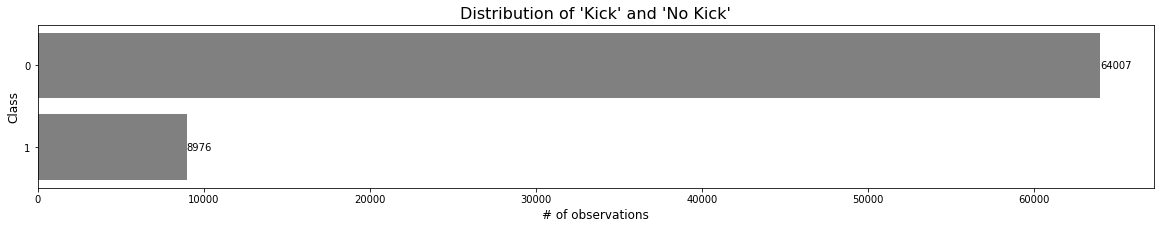

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3)) # set the size of the figure
sns.countplot(y='IsBadBuy', data=df, color='grey', ax=ax) # plot the countplot

# Annotation
ax.bar_label(ax.containers[0]) # add the count on the top of each bar

plt.xlabel('# of observations', fontsize=12) # set the label of x axis
plt.ylabel('Class', fontsize=12) # set the label of y axis
plt.title("Distribution of 'Kick' and 'No Kick'", fontsize=16) # set the title of the plot

plt.show() # display the plot

The amount of no-kicks is much higher than for kicks, resulting in a difference of 55,031 samples.

Now that we have a better understanding of the data set, we can clean the data set. Let's inspect the missing values and decide how to handle the correlation between some attributes.

#### Missing values

**Calculate the percentage of missing values for each feature**

An overview of the missing values will help you decide how to handle them. The feature may be removed if the percentage of missing values is high. If a feature is not fully present in more than 30% of the examples, it should be considered to exclude the feature. For features with fewer missing examples, it is always necessary to decide how to proceed depending on the underlying use case.

Missing values can significantly impact the performance of a machine learning model. The model can be biased if the missing values are not missing at random. For instance, if the missing values are only present in one class, the model will be biased towards this class.

NOTE: A decision tree can handle missing values. However, handling missing values before training the model is a good practice.

In [10]:
missing_values = df.isnull().sum() / len(df) * 100 # calculate the ratio of missing values, count the number of missing values in each column and divide by length of the data frame, then multiply by 100
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values
print(f'Ratio of missing values: % \n{missing_values.sort_values(ascending=False)}')

Ratio of missing values: % 
AUCGUART                          95.315347
PRIMEUNIT                         95.315347
WheelType                          4.348958
Trim                               3.233630
CurrentAuctionAveragePrice         0.431607
CurrentRetailCleanPrice            0.431607
CurrentRetailAveragePrice          0.431607
CurrentAuctionCleanPrice           0.431607
VehBCost                           0.093172
AcquisitionRetailAveragePrice      0.024663
AcquisitonRetailCleanPrice         0.024663
AcquisitionAuctionAveragePrice     0.024663
AcquisitionAuctionCleanPrice       0.024663
Transmission                       0.012332
SubModel                           0.010961
Color                              0.010961
TopThreeAmericanName               0.006851
Size                               0.006851
Nationality                        0.006851
dtype: float64


More than 95% of the values are missing for 'AUCGUART' and 'PRIMEUNIT'. These features will be dropped. Because the company did not previously fill this variable, 95% of the variable is missing.

The method `drop()` removes the columns from the data set. The parameter `axis=1` specifies that the columns are removed. The parameter `inplace=True` specifies that the data set is changed in place and does not return a copy of the data set.

In [11]:
# Drop columns 'AUCGUART' and 'PRIMEUNIT'
df.drop(['AUCGUART', 'PRIMEUNIT'], axis=1, inplace=True) 

Let's have a look at the missing values for each class. The following plot shows the missing values for each class of the target variable 'IsBadBuy'. A seaborn heatmap shows the gradation of the missing values by color.

A short explanation of the parameters: 

`.T` transposes the data set to display the features on the x-axis and the classes on the y-axis. `Cmap` specifies the color palette, `annot=True` displays the values in the heatmap, `fmt='g'` formats the values as numbers, `annot_kws={'size': 10}` specifies the size of the values, `linewidths=0.5` specifies the width of the lines between the cells, `square=True` specifies that the cells are square-shaped and `cbar_kws={'label': '# missing values','shrink': .20 }` specifies the label and size of the color bar.

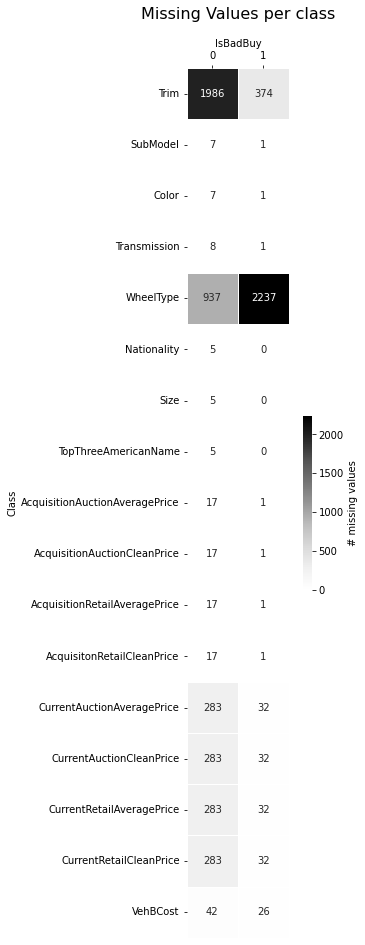

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values per distinct class of 'IsBadBuy'
missing_data = df.groupby('IsBadBuy').apply(lambda x: x.isnull().sum())

# Drop 'IsBadBuy' column in missing_data
missing_data.drop('IsBadBuy', axis=1, inplace=True)
# Display only features with missing values
missing_data = missing_data.loc[:, (missing_data != 0).any(axis=0)]

# Plot the missing values
fig, ax = plt.subplots(figsize=(5, 16))
plt.title('Missing Values per class', fontsize=16, pad=20)
sns.heatmap(missing_data.T, cmap='Greys', annot=True, fmt='g', 
            annot_kws={'size': 10},
            linewidths=.5,
            square=True,
            cbar_kws={'label': '# missing values','shrink': .20 }) 
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel('IsBadBuy')
plt.ylabel('Class')
plt.show()

The missing values for the feature 'Trim' are higher for the class No kick than for the class kick. For the attribute 'WheelType', the values are predominantly missing for class kick (1). If we leave the imbalance of the values as it is, the model will be biased toward the respective class.

There are different approaches for handling missing values. For the Column 'Trim', the missing values will be replaced with the base model 'bas'; for 'Color', the missing values will be replaced by the value 'NOT AVAIL'.

The `fillna()` method replaces the missing values with the specified value. Pandas comes with built-in methods to calculate the mean. The method `mean()` calculates the mean of the column.

In [13]:
df['Color'].fillna('NOT AVAIL', inplace=True) 
df['Trim'].fillna('Bas', inplace=True)

# Replace missiing values in 'WheelType' with 'Alloy'
df['WheelType'].fillna('Alloy', inplace=True)

# Replace missiing values in VehBCost with mean
df['VehBCost'].fillna(df['VehBCost'].mean(), inplace=True)

The missing values will be replaced by the mean of the column for the price features. As usual, it depends on the use case how to handle missing values.

Note: scikit-learn provides [different imputer](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) to handle missing values. 

In [14]:
# Replace missing values in AcquisitionAuctionAveragePrice, AcquisitionAuctionCleanPrice, AcquisitionRetailAveragePrice & AcquisitonRetailCleanPrice with mean
df['AcquisitionAuctionAveragePrice'].fillna(df['AcquisitionAuctionAveragePrice'].mean(), inplace=True)
df['AcquisitionAuctionCleanPrice'].fillna(df['AcquisitionAuctionCleanPrice'].mean(), inplace=True)
df['AcquisitionRetailAveragePrice'].fillna(df['AcquisitionRetailAveragePrice'].mean(), inplace=True)
df['AcquisitonRetailCleanPrice'].fillna(df['AcquisitonRetailCleanPrice'].mean(), inplace=True)

In [15]:
# Replace missing values in CurrentAuctionAvgPrice, CurrentAuctionCleanPrice, CurrentRetailAveragePrice & CurrentRetailCleanprice with mean
df['CurrentAuctionAveragePrice'].fillna(df['CurrentAuctionAveragePrice'].mean(), inplace=True)
df['CurrentAuctionCleanPrice'].fillna(df['CurrentAuctionCleanPrice'].mean(), inplace=True)
df['CurrentRetailAveragePrice'].fillna(df['CurrentRetailAveragePrice'].mean(), inplace=True)
df['CurrentRetailCleanPrice'].fillna(df['CurrentRetailCleanPrice'].mean(), inplace=True)

The remaining rows that contain missing values will be dropped.

In [16]:
df.dropna(inplace=True)

<span style='background-color:#785EF0'>NOTE</span>: Some data sets contain an ID/Identifier column, which is not used for training the model. The column can also be dropped, as it has no use for the model.

**Show distribution of class 0 and 1 for target variable 'IsBadBuy' after handling missing values**

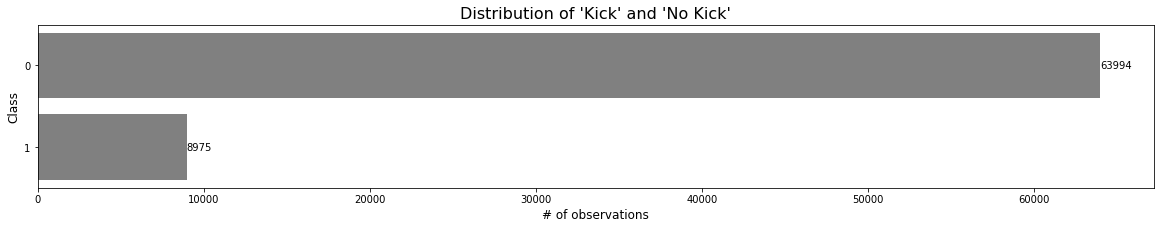

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))
sns.countplot(y='IsBadBuy', data=df, color='grey', ax=ax)

# Add annotation
ax.bar_label(ax.containers[0])

plt.xlabel('# of observations', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.title("Distribution of 'Kick' and 'No Kick'", fontsize=16)
plt.show()

The x-axis shows the number of samples, the y-axis shows the class. The data set is heavily imbalanced, meaning the number of samples in class 0 is much higher than in class 1. We'll deal with this later when we train the model in the [Decision Tree Notebook](/supervised_learning/classification/decision_tree/code/decision_tree_classifier_tutorial.ipynb).

In [18]:
# Calculate the percentage of class 0
print(f'\n Percentage of class 0: {round(df["IsBadBuy"].value_counts()[0]/len(df)*100,2)}%')

# Calculate the percentage of class 1
print(f'\n Percentage of class 1: {round(df["IsBadBuy"].value_counts()[1]/len(df)*100,2)}%')


 Percentage of class 0: 87.7%

 Percentage of class 1: 12.3%


As this data set is a real-world data set, it is not surprising that the data set is imbalanced. In real-world data sets, the number of samples in one class is often much higher than in the other class(es). If you want to tackle another imbalanced problem, check out the European cardholder data set with 0.172% fraud cases compared to 99.828% no fraud cases. But for this example the goal would probably be to classify the fraud cases correctly and generalize the model for new data.

The ability to correctly categorize new samples that differ from those used for training is called generalization. The model should be able to generalize well to new data. If the model is trained on imbalanced data, it will be biased toward the majority class. The model will be able to do a good job of predicting the majority class, but it will probably not be able to do a good job of predicting the minority class. There are several approaches for dealing with imbalanced data sets. We will address this later when we train the models.

#### Correlation

**Correlation Matrix**

The correlation matrix shows the relationship between two variables. The correlation ranges from -1 to 1. 

* A positive sign indicates that both attributes move in the same direction (consequently, if the value of one variable increases, the value of the other also increases). <br>
If the value is close to 1, the correlation is positive. If one value changes, the other value changes in the same direction. 


* A negative sign says the opposite about the correlation; if one variable's value increases, the other's value decreases. <br>
If it is close to -1, the correlation is negative. If one value changes, the other value changes in the opposite direction. 
<br>

* A value of zero or close to zero indicates that there is no relationship. <br>
If the value is close to 0, there is no linear correlation. 

Correlation can impact the model differently depending on the kind of features. We'll look at the feature correlation and the correlation between the features and the target variable.

The correlation matrix shows the correlation between the numerical features. The target variable is included for now; feel free to remove it and compute this in a separate step.

The first step is to compute the correlation using the [pandas function corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). The Pearson correlation coefficient (standard correlation coefficient) is used by default. The Pearson correlation coefficient measures the linear relationship between two attributes, meaning the dependence between two attributes. 

Since the matrix is mirrored, it is sufficient to show only one triangle. This is done by using the [numpy function triu()](https://numpy.org/doc/stable/reference/generated/numpy.triu.html).

The correlation matrix is then visualized using the seaborn heatmap. The custom color palette ranges from grey (correlation) to white (no correlation). 

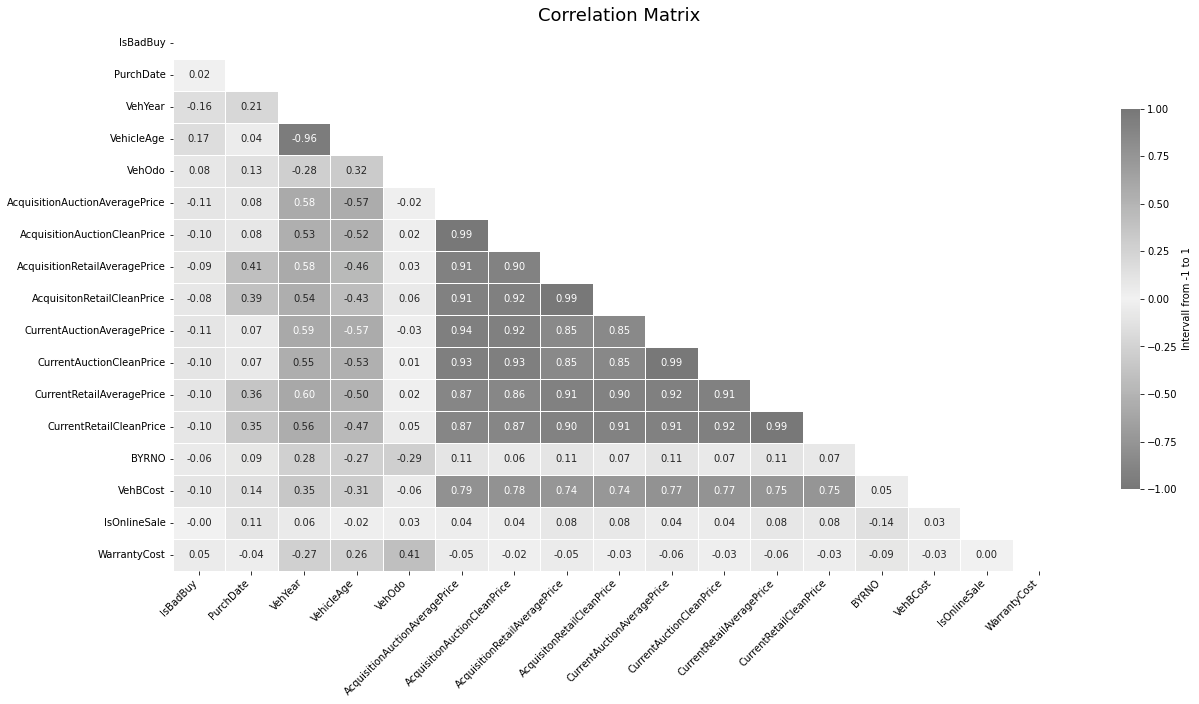

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = df.corr(method='pearson')   
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask to show only one triangle of the heatmap

f, ax = plt.subplots(figsize=(20, 10))
plt.title('Correlation Matrix', fontsize=18)

# Define a custom color palette
cmap = sns.diverging_palette(h_neg=0, h_pos=0, s=0, as_cmap=True) # Generate a custom diverging colormap, h_neg and h_pos are the hue values for the negative and positive halves of the map

sns.heatmap(corr, # use the calculated corr 
            mask=mask,
            cmap=cmap, 
            annot=True,
            fmt='.2f', # two decimal places
            annot_kws={'size': 10},
            vmin=-1, vmax=1, center=0, # set the range of the colorbar to -1 and 1
            linewidths=.5,
            cbar_kws={'label': 'Intervall from -1 to 1', 'shrink': .70})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

This heatmap shows that some features correlate negatively and positively. The Acquisition** and Current** price features have a high positive correlation. So, if one value changes, the other value changes in the same direction.

**Regression plot**

The regplot shows the (linear) relationship between two features. We'll use four regression plots to show the relationship between the features Acquisition-** and Current-**. 

Let's have a brief look at the parameters: `marker='+'` defines the shape of the marker, `scatter_kws={'s: 10, 'color':'purple'}` specifies the size and color of the marker, `line_kws={'lw': 2}` defines the line width. A regression plot shows the relationship between two variables. The x-axis shows the values of the first attribute, and the y-axis shows the values of the second attribute. The line shows the linear relationship between the two features. The scatter plots show the values of the features.

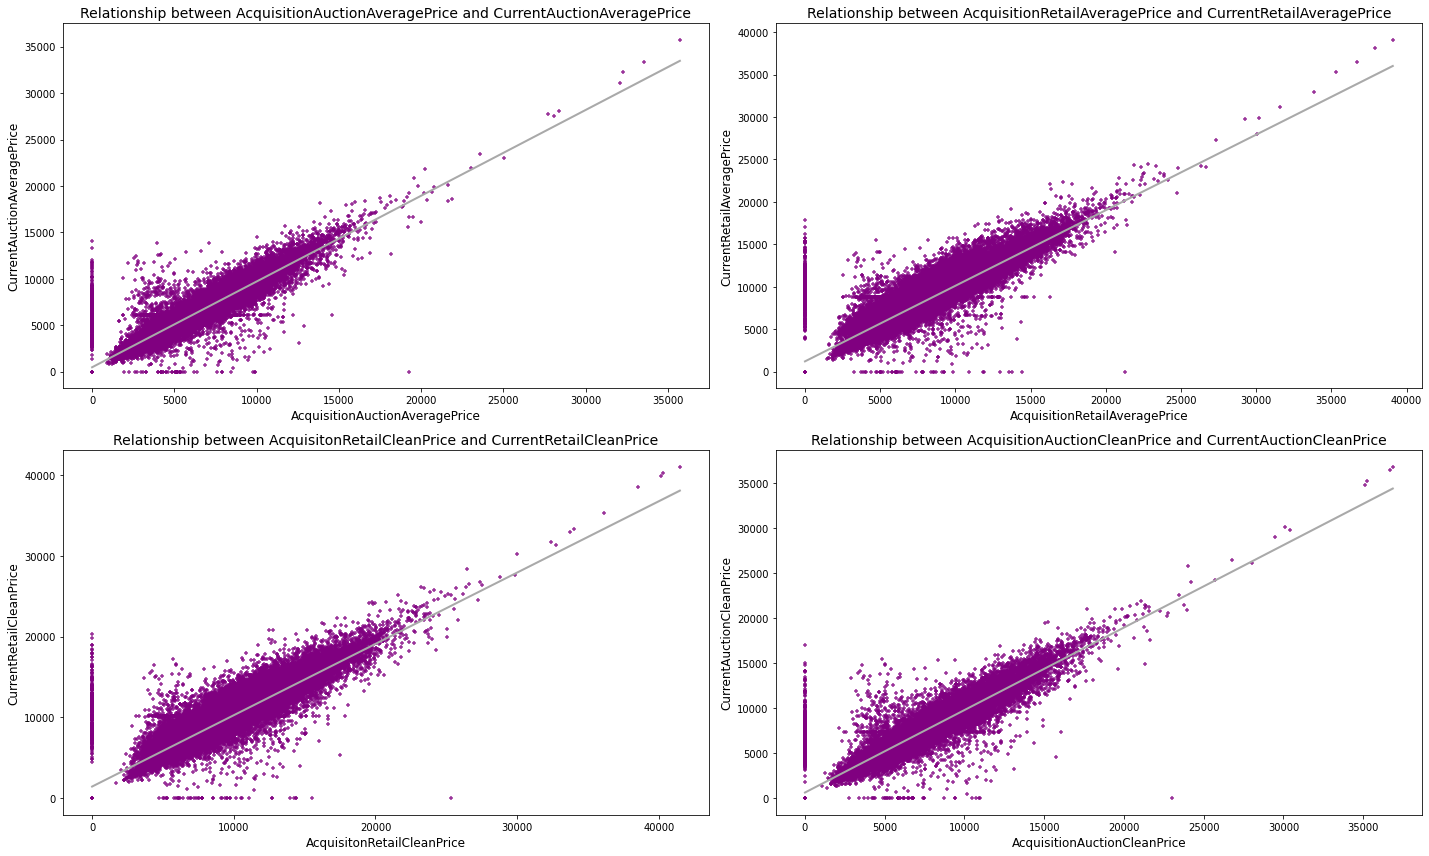

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(20, 12)) # Create a 2 x 2 grid of subplots

# Plot first subplot
sns.regplot(x='AcquisitionAuctionAveragePrice', y='CurrentAuctionAveragePrice', data=df, marker='+', color='darkgrey', scatter_kws={'s': 10, 'color':'purple'}, line_kws={'lw': 2}, ax=axes[0, 0])
axes[0, 0].set_xlabel('AcquisitionAuctionAveragePrice', fontsize=12)
axes[0, 0].set_ylabel('CurrentAuctionAveragePrice', fontsize=12)
axes[0, 0].set_title('Relationship between AcquisitionAuctionAveragePrice and CurrentAuctionAveragePrice', fontsize=14)

# Plot second subplot
sns.regplot(x='AcquisitionRetailAveragePrice', y='CurrentRetailAveragePrice', data=df, marker='+', color='darkgrey', scatter_kws={'s': 10, 'color':'purple'}, line_kws={'lw': 2}, ax=axes[0, 1])
axes[0, 1].set_xlabel('AcquisitionRetailAveragePrice', fontsize=12)
axes[0, 1].set_ylabel('CurrentRetailAveragePrice', fontsize=12)
axes[0, 1].set_title('Relationship between AcquisitionRetailAveragePrice and CurrentRetailAveragePrice', fontsize=14)

# Plot third subplot
sns.regplot(x='AcquisitonRetailCleanPrice', y='CurrentRetailCleanPrice', data=df, marker='+', color='darkgrey', scatter_kws={'s': 10, 'color':'purple'}, line_kws={'lw': 2}, ax=axes[1, 0])
axes[1, 0].set_xlabel('AcquisitonRetailCleanPrice', fontsize=12)
axes[1, 0].set_ylabel('CurrentRetailCleanPrice', fontsize=12)
axes[1, 0].set_title('Relationship between AcquisitonRetailCleanPrice and CurrentRetailCleanPrice', fontsize=14)

# Plot fourth subplot
sns.regplot(x='AcquisitionAuctionCleanPrice', y='CurrentAuctionCleanPrice', data=df, marker='+', color='darkgrey', scatter_kws={'s': 10, 'color':'purple'} ,line_kws={'lw': 2}, ax=axes[1, 1])
axes[1, 1].set_xlabel('AcquisitionAuctionCleanPrice', fontsize=12)
axes[1, 1].set_ylabel('CurrentAuctionCleanPrice', fontsize=12)
axes[1, 1].set_title('Relationship between AcquisitionAuctionCleanPrice and CurrentAuctionCleanPrice', fontsize=14)

plt.tight_layout()  # Subplot spacing
plt.show()


The regression line shows the trend of the data, the scatter plots show a positive slope. 

Each + stands for one vehicle. 

The scatter points show how the data points are distributed in the plot. If the points are more concentrated around the regression line, it indicates a stronger linear relationship between the variables (which is a higher absolute value in their correlation). If the data points are more scattered, the relationship is weaker.

The little + on the end of the regression line and at 0 (both axes) are outliers. We'll deal with them later.

We'll look at the correlation between these and the target variable to decide which features to remove. Let's calculate the correlation between the price features and the target variable. We use the Pearson correlation coefficient again to have a comparable value.

In [21]:
corr = df['IsBadBuy'].corr(df['AcquisitionAuctionAveragePrice'], method='pearson')
print(f'Correlation between target variable and AcquisitionAuctionAveragePrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['AcquisitionAuctionCleanPrice'], method='pearson')
print(f'Correlation between target variable and AcquisitionAuctionCleanPrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['AcquisitionRetailAveragePrice'], method='pearson')
print(f'Correlation between target variable and AcquisitionRetailAveragePrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['AcquisitonRetailCleanPrice'], method='pearson')
print(f'Correlation between target variable and AcquisitonRetailCleanPrice: {corr:.3f}')

Correlation between target variable and AcquisitionAuctionAveragePrice: -0.109
Correlation between target variable and AcquisitionAuctionCleanPrice: -0.103
Correlation between target variable and AcquisitionRetailAveragePrice: -0.087
Correlation between target variable and AcquisitonRetailCleanPrice: -0.084


In [22]:
corr = df['IsBadBuy'].corr(df['CurrentAuctionAveragePrice'], method='pearson')
print(f'Correlation between target variable and CurrentAuctionAveragePrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['CurrentAuctionCleanPrice'], method='pearson')
print(f'Correlation between target variable and CurrentAuctionCleanPrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['CurrentRetailAveragePrice'], method='pearson')
print(f'Correlation between target variable and CurrentRetailAveragePrice: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['CurrentRetailCleanPrice'], method='pearson')
print(f'Correlation between target variable and CurrentRetailCleanPrice: {corr:.3f}')

Correlation between target variable and CurrentAuctionAveragePrice: -0.109
Correlation between target variable and CurrentAuctionCleanPrice: -0.104
Correlation between target variable and CurrentRetailAveragePrice: -0.104
Correlation between target variable and CurrentRetailCleanPrice: -0.100


**Bar plot**

We can calculate the correlation between these price features and the target variable using the [pandas function corrwith()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html). The - here only negative - correlation between the features and the target variable is then visualized in a barplot.

A barplot visualizes differences between the features. The height of the rectangles represents the correlation with the target variable. The x-axis displays the features, the y-axis the correlation.

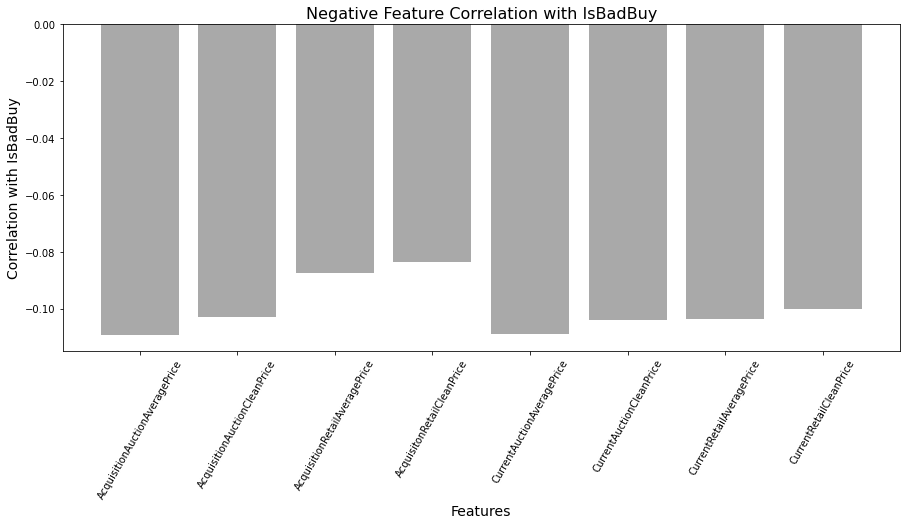

In [23]:
import matplotlib.pyplot as plt

# Separate the price features and the target variable
features = df.drop(['IsBadBuy', 'PurchDate' ,'VehicleAge', 'VehOdo', 'WarrantyCost','IsOnlineSale', 'VehBCost', 'VehYear', 'BYRNO'], axis=1)
label = df['IsBadBuy']

# Calculate the correlation between each feature and the target variable
corr = features.corrwith(label)

# Create a figure and plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(corr.index, corr, color='darkgrey')
plt.title('Negative Feature Correlation with IsBadBuy', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with IsBadBuy', fontsize=14)
plt.xticks(rotation=60)

plt.show()


It is sufficient to keep one category of the price features, the Acquisition**Price will be dropped because the correlation with the target variable is closer to 0. A correlation closer to 0 means a less linear relationship between the features. 

In [24]:
# Drop AcquisitionAuctionAveragePrice, AcquisitionRetailAveragePrice, AcquisitonRetailCleanPrice, AcquisitionAuctionCleanPrice
df.drop(['AcquisitionAuctionAveragePrice', 'AcquisitionRetailAveragePrice', 'AcquisitonRetailCleanPrice','AcquisitionAuctionCleanPrice'], axis=1, inplace=True)

The question we can always ask is whether we can drop some features because they give us the same information as other features, so we can reduce the dimensions. Keep in mind negative and positive correlations are both useful for the model.

The attribute 'VehicleAge' has a high negative correlation with 'VehYear'. This is not surprising, as the age of the vehicle is calculated from the year of manufacture. Let's look at the correlation between the features and the target variable.

In [25]:
corr = df['VehicleAge'].corr(df['VehYear'], method='pearson')
print(f'Correlation of vehicle age and year: {corr:.3f}')

corr = df['VehicleAge'].corr(df['IsBadBuy'], method='pearson')
print(f'Correlation between vehicle age and target variable: {corr:.3f}')

corr = df['IsBadBuy'].corr(df['VehYear'], method='pearson')
print(f'Correlation between vehicle year and target variable: {corr:.3f}')

Correlation of vehicle age and year: -0.958
Correlation between vehicle age and target variable: 0.167
Correlation between vehicle year and target variable: -0.159


The correlation between the two attributes is highly negative. The attribute VehYear will be dropped, as it's correlation with the target variable 'IsBadBuy' is slightly closer to 0.

In [26]:
# Drop column 'VehYear'
df.drop('VehYear', axis=1, inplace=True)

You can check the other numerical features and decide to keep or drop them, depending on the correlation with the target variable.

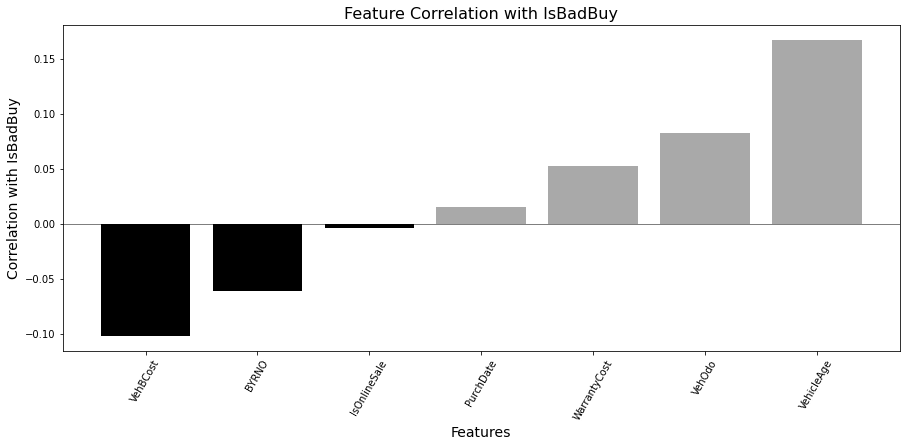

In [27]:
import matplotlib.pyplot as plt

# Separate the features and the target variable
features = df.drop(['IsBadBuy', 'CurrentAuctionAveragePrice', 'CurrentAuctionCleanPrice',
                    'CurrentRetailAveragePrice', 'CurrentRetailCleanPrice'], axis=1)
label = df['IsBadBuy']

# Calculate the correlation between each feature and the target variable
corr = features.corrwith(label)
# Sort the features based on their correlation values
sorted_corr = corr.sort_values()

plt.figure(figsize=(15, 6))

# Set colors based on positive and negative correlations
colors = ['darkgrey' if c >= 0 else 'black' for c in sorted_corr]

plt.bar(sorted_corr.index, sorted_corr, color=colors)
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Features', fontsize= 14)
plt.ylabel('Correlation with IsBadBuy', fontsize=14)
plt.title('Feature Correlation with IsBadBuy', fontsize=16)
plt.xticks(rotation=60)

plt.show()


The remaining numerical features have a positive and negative correlation with the target variable. The correlation is not very high, but we'll keep the features for now. Even if the correlation is not very high, the features can still be useful for the model. The correlation is only one indicator of whether to keep or drop a feature.

#### Outliers

An outlier is an instance that differs strongly from other instances in the sample. 

Decision trees remain unchanged under modified conditions with (strictly monotonic) transformations of the individual predictors. As a result, they are insensitive to the effects of outliers in the predictors. However, as this data set could be used for other models as well, we'll have a look at the outliers. Some models are more sensitive to outliers than others. 

**Box plot for statistical measure**

The box plot shows statistical measures as the median but also displays the outliers of the features.

Now we want only the plots for the price features, hence we'll drop the other numerical features and create a new data frame. The initial data frame will be kept for the next steps (no inplace=True).

In [28]:
# Drop columns
df_2 = df.drop(['PurchDate', 'VehOdo', 'IsBadBuy', 'VehicleAge','BYRNO' ,'IsOnlineSale'], axis=1)

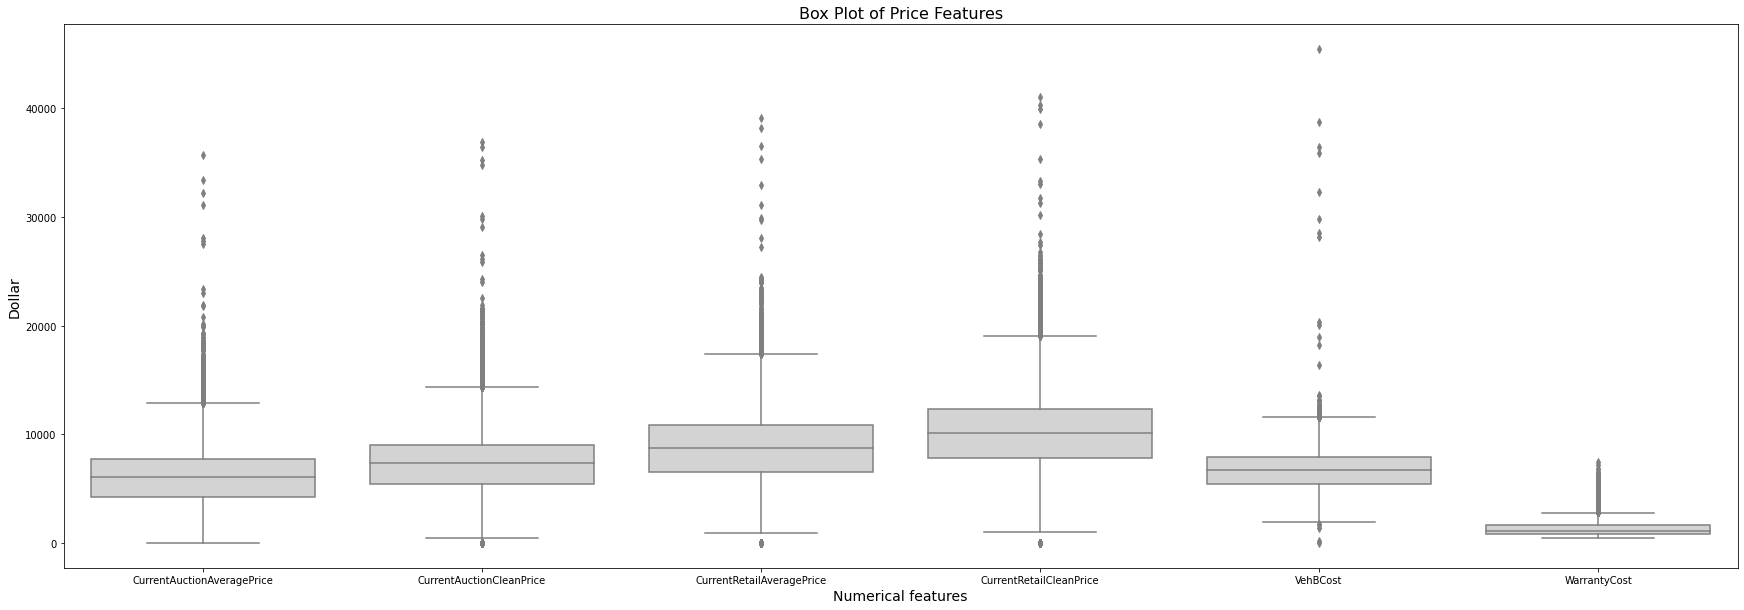

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns by data type
numerical_features = df_2.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(figsize=(30, 10))

sns.boxplot(data=df_2[numerical_features], color='lightgrey')

# Set the title and axis labels
plt.title('Box Plot of Price Features', fontsize=16)
plt.xlabel('Numerical features', fontsize=14)
plt.ylabel('Dollar', fontsize=14)

plt.show()


This box plot shows some outliers (dots outside of the box and whiskers).
The box shows the 25th and 75th percentile. The whiskers show the range of the data. 
The median is the middle value of all prices per feature. The median is used instead of the mean because the mean is sensitive to outliers. The median is not affected by outliers. 

This box plot shows the prices for the vehicles and acquisition costs. For example, look at the median for 'CurrentRetailAveragePrice' with \$8,753 and the mean with \$8,776. 

The mean and median are close together, which is one indicator of a normal distribution.

In [30]:
# Print median and mean of each of the numerical_features
for column in numerical_features:
    mean_value = df_2[column].mean()
    median_value = df_2[column].median()
    print(f"Column: {column}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print()

Column: CurrentAuctionAveragePrice
Mean: 6132.23
Median: 6076.00

Column: CurrentAuctionCleanPrice
Mean: 7390.85
Median: 7328.00

Column: CurrentRetailAveragePrice
Mean: 8776.04
Median: 8753.00

Column: CurrentRetailCleanPrice
Mean: 10145.73
Median: 10114.00

Column: VehBCost
Mean: 6729.32
Median: 6705.00

Column: WarrantyCost
Mean: 1276.55
Median: 1155.00



There are many ways to remove outliers. Handling them depends on the data set and the underlying task - and it depends on the model. For further information, see [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/) or [IQR](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) method. The z-score method is used to detect outliers based on the standard deviation. The IQR method is used to detect outliers based on the quartiles.

For now, removing the \$0.0/1.0 from the Current**Price features and one value from the VehBCost feature is sufficient. Tree-based models are more robust to outliers. If you want to use a linear model, consider removing more outliers with one of the above methods.

In [31]:
# Set the columns to filter
columns_to_filter = ['VehBCost', 'CurrentAuctionAveragePrice', 'CurrentAuctionCleanPrice', 'CurrentRetailAveragePrice', 'CurrentRetailCleanPrice']

# Filter rows where values in specified columns are smaller than $10
df.drop(df[(df[columns_to_filter] <= 10).any(axis=1)].index, inplace=True)

#### Distribution of features

Getting an overview of the distribution is helpful for us to better assess the data. This allows us to see what the data set contains and whether there are other anomalies or patterns that could influence the model.

**Plot the distribution of features using a histogram**

The x-axis shows the values and the y-axis shows the number of values. By organizing the data into bins and showing the frequency of samples per bin, the distribution of the data can be visualized. Bins are intervals that organize the entire range of values into groups. Bins are consecutive, non-overlapping intervals of a variable. The bins must be adjacent and are often (but not necessarily) of the same size.

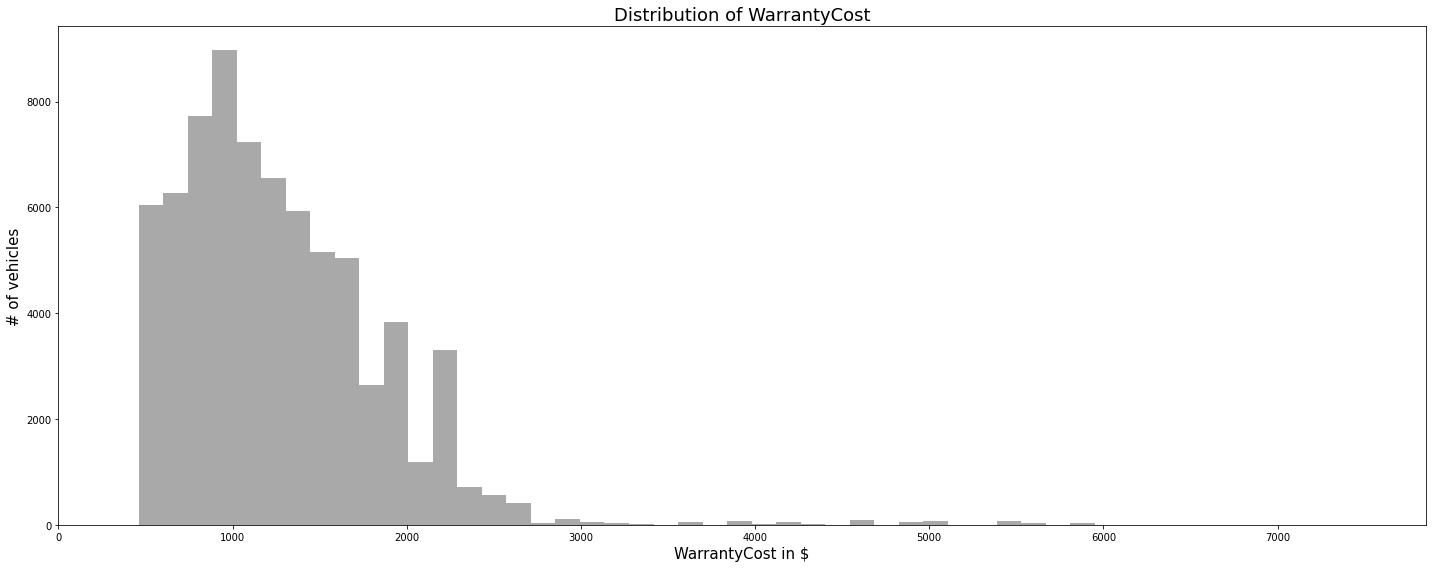

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.hist(df['WarrantyCost'], color='darkgrey', bins=50)
plt.title('Distribution of WarrantyCost', fontsize=18)
plt.xlabel('WarrantyCost in $', fontsize=15)
plt.ylabel('# of vehicles', fontsize=15)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

<span style="background-color:#648FFF">Excursion</span> 

Skewness is a statistical measure that describes the type and strength of asymmetry in a probability distribution. Any non-symmetric distribution is skewed, right-skewed or left-skewed. For more information, see [statistical measure](poc/supervised_learning/decision_tree/explainer/statistical_measure.md).

<span style="background-color:#648FFF">*********</span> 

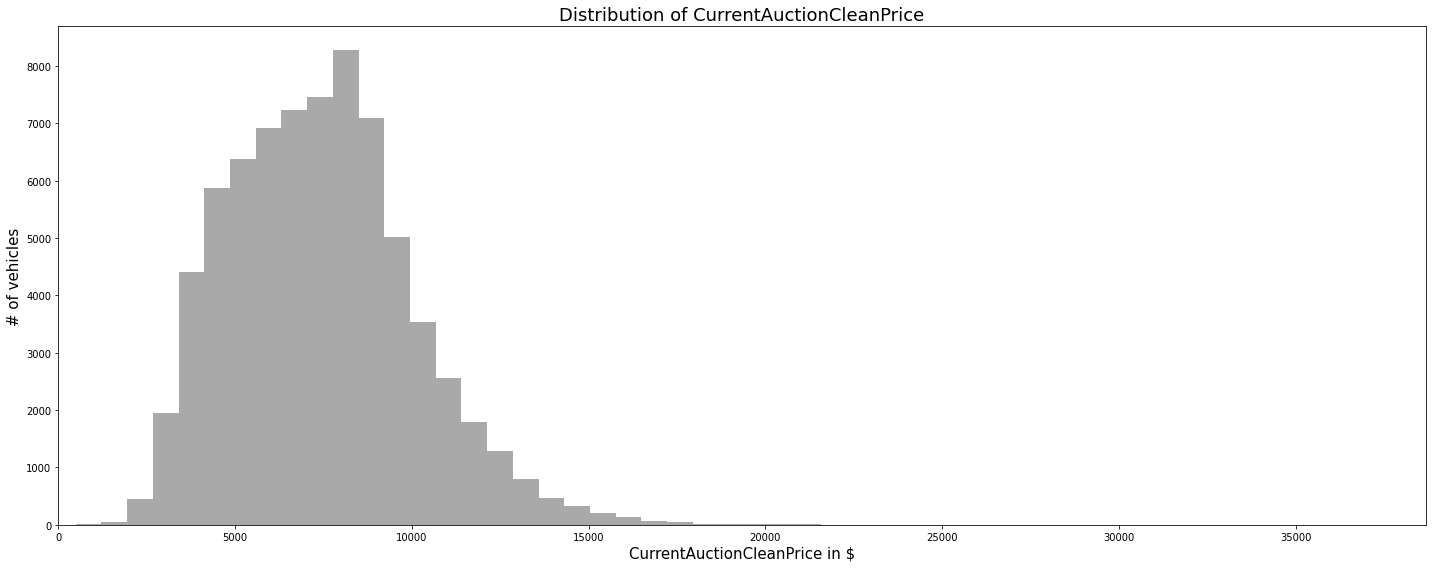

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.hist(df['CurrentAuctionCleanPrice'], color='darkgrey', bins=50)
plt.title('Distribution of CurrentAuctionCleanPrice', fontsize=18)
plt.xlabel('CurrentAuctionCleanPrice in $', fontsize=15)
plt.ylabel('# of vehicles', fontsize=15)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

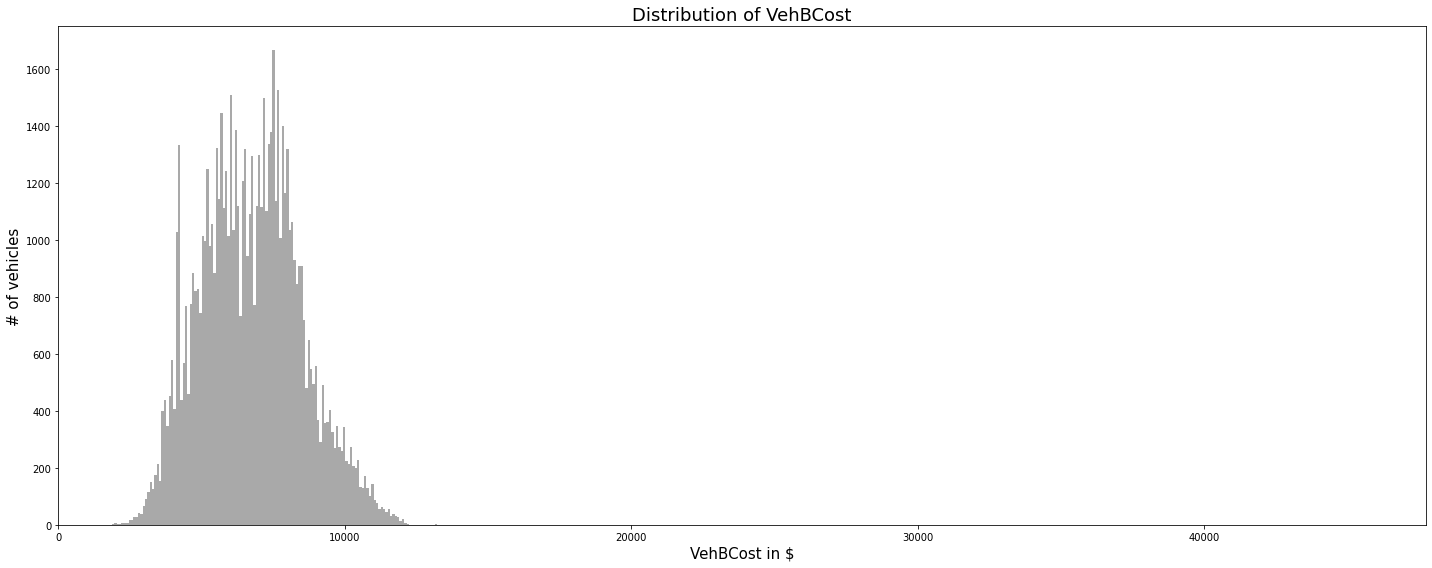

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.hist(df['VehBCost'], color='darkgrey', bins=550)
plt.title('Distribution of VehBCost', fontsize=18)
plt.xlabel('VehBCost in $', fontsize=15)
plt.ylabel('# of vehicles', fontsize=15)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

These plots show the distribution of the features, WarrantyCost, CurrentAuctionCleanPrice and VehBCost, respectively. The x-axis shows the values of the features. The y-axis indicates the number of samples. The plots show that all three features have a right-skewed distribution. 

Note that the bins for 'VehBCost' are higher than for the other features. The distribution of 'VehBCost' is displayed in more detail than the distribution of the other features.

The distributions of the numerical features are often highly skewed and long-tailed. In many real-world scenarios, natural phenomena often exhibit skewed distributions. For example, income tends to have a long tail and is right-skewed, with a few extreme values (for very high income) in the upper end.

Let's have a look at a left-skewed distribution:

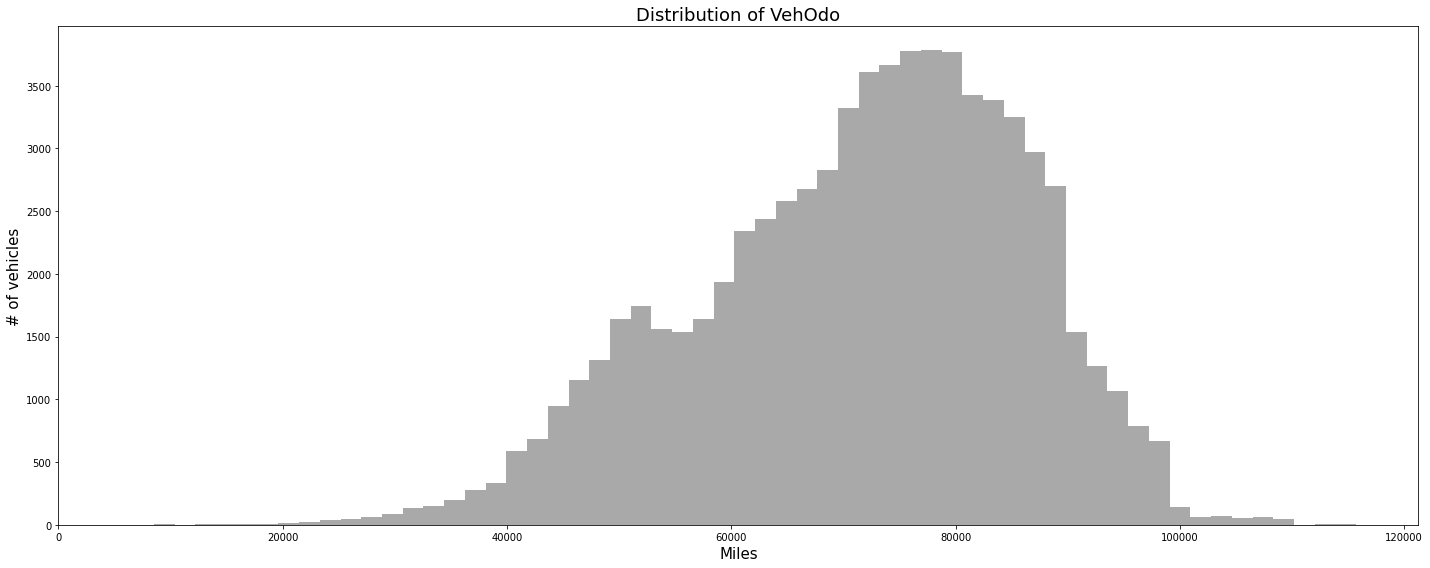

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.hist(df['VehOdo'], color='darkgrey', bins=60)
plt.title('Distribution of VehOdo', fontsize=18)
plt.xlabel('Miles', fontsize=15)
plt.ylabel('# of vehicles', fontsize=15)
plt.xlim(left=0)  # Set the x-axis lower limit to 0
plt.tight_layout()
plt.show()

In [36]:
# Show median for 'VehOdo'
print(f'Median of VehOdo: {df["VehOdo"].median()}')

# Show mean for 'VehOdo'
print(f'Mean of VehOdo: {df["VehOdo"].mean():.2f}')

# Show min for 'VehOdo'
print(f'Minimum of VehOdo: {df["VehOdo"].min()}')

Median of VehOdo: 73359.0
Mean of VehOdo: 71498.56
Minimum of VehOdo: 4825


The mean of VehOdo is less than the median. The mean is typically smaller than the median in a left-skewed distribution because the left tail (lower values) pulls the mean to the left.
The VehOdo minimum value at 4825 indicates that data points with relatively small mileages contribute to the longer left tail. The mean is smaller than the median and the minimum is on the left side of the distribution. This indicates a concentration of data to the right (higher values) and a longer tail to the left, a characteristic of a left-skewed distribution.

Impact on the model:

A skewed distribution can significantly impact the performance of a machine learning model. The model can be biased (distorted) if the distribution is not symmetric. For instance, if the distribution is right-skewed, the model could be biased towards the right side of the distribution. Let's look at the distribution of the features per class.

**Plot distribution of features per class**

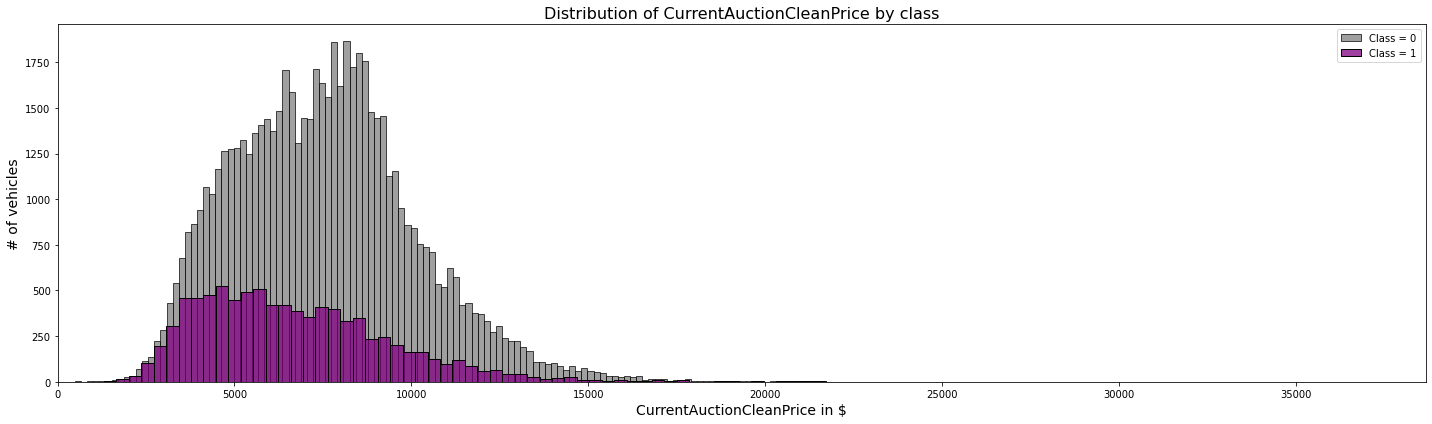

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Filter data per class
sns.histplot(data=df[df['IsBadBuy'] == 0], x='CurrentAuctionCleanPrice', color='grey', ax=ax, label='Class = 0') 
sns.histplot(data=df[df['IsBadBuy'] == 1], x='CurrentAuctionCleanPrice', color='purple', ax=ax, label='Class = 1') 

ax.set_title('Distribution of CurrentAuctionCleanPrice by class', fontsize=16)
ax.set_xlabel('CurrentAuctionCleanPrice in $', fontsize=14)
ax.set_xlim(0)  # Set the x-axis limit to start at 0
ax.set_ylabel('# of vehicles', fontsize=14)
ax.legend()

fig.tight_layout()
plt.show()

Class 0 has more observations than class 1. The CurrentAuctionCleanPrice ranges from \$494 to \$25,847 within class 0 and \$1,308 to \$36,859 within class 1.

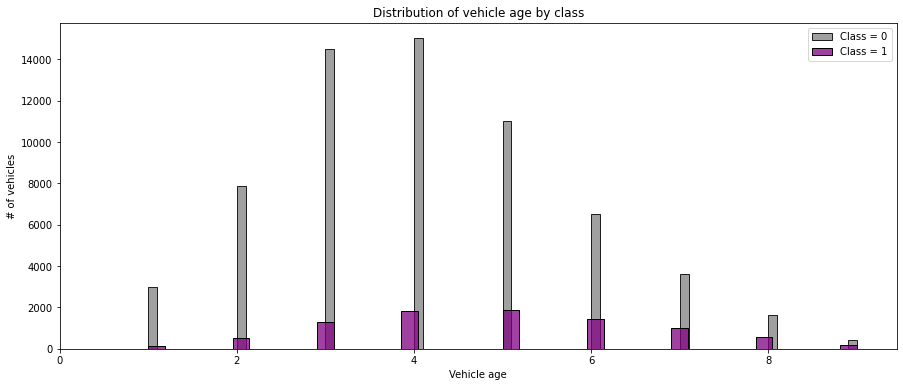

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

# Filter data per class
sns.histplot(data=df[df['IsBadBuy'] == 0], x='VehicleAge', color='grey', label='Class = 0')
sns.histplot(data=df[df['IsBadBuy'] == 1], x='VehicleAge', color='purple', label='Class = 1')
ax.set_xlim(0)
ax.set_title('Distribution of vehicle age by class')
ax.set_xlabel('Vehicle age')
ax.set_ylabel('# of vehicles')
ax.legend()

plt.show()

Again, Class 0 has more observations than class 1. The vehicle age ranges from 0 to 9 years within class 0 and 1 to 9 years within class 1.

We've only shown a few plots to illustrate and have limited the number of histograms for the numerical features to keep the tutorial manageable.  Please plot the distribution of the other numerical features if you like.

**Distribution of categorical features**

Barplots of the distribution of Manufacturer and target class

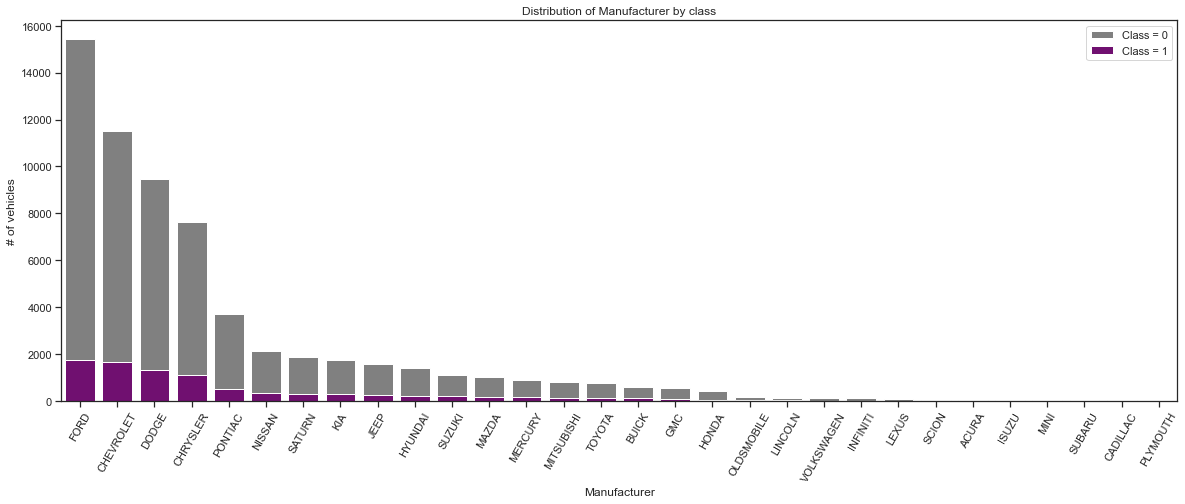

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each category
category_counts = df['Make'].value_counts()

# Sort the categories based on counts
ordered_categories = category_counts.sort_values(ascending=False).index 

# Filter the data for IsBadBuy = 0
data_is_bad_buy_0 = df[df['IsBadBuy'] == 0]
data_is_bad_buy_0_counts = data_is_bad_buy_0['Make'].value_counts()

# Filter the data for IsBadBuy = 1
data_is_bad_buy_1 = df[df['IsBadBuy'] == 1]
data_is_bad_buy_1_counts = data_is_bad_buy_1['Make'].value_counts()

# Create the barplot
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=data_is_bad_buy_0_counts.index, y=data_is_bad_buy_0_counts.values, color='grey', ax=ax, label='Class = 0')
sns.barplot(x=data_is_bad_buy_1_counts.index, y=data_is_bad_buy_1_counts.values, color='purple', ax=ax, label='Class = 1')

plt.title('Distribution of Manufacturer by class')
plt.xlabel('Manufacturer')
plt.ylabel('# of vehicles')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=60)
plt.legend()

plt.show()

We can see that Chevrolet, Dodge and Ford are the most frequent manufacturers in the data set and per class.

Histogram for Color distribution per class

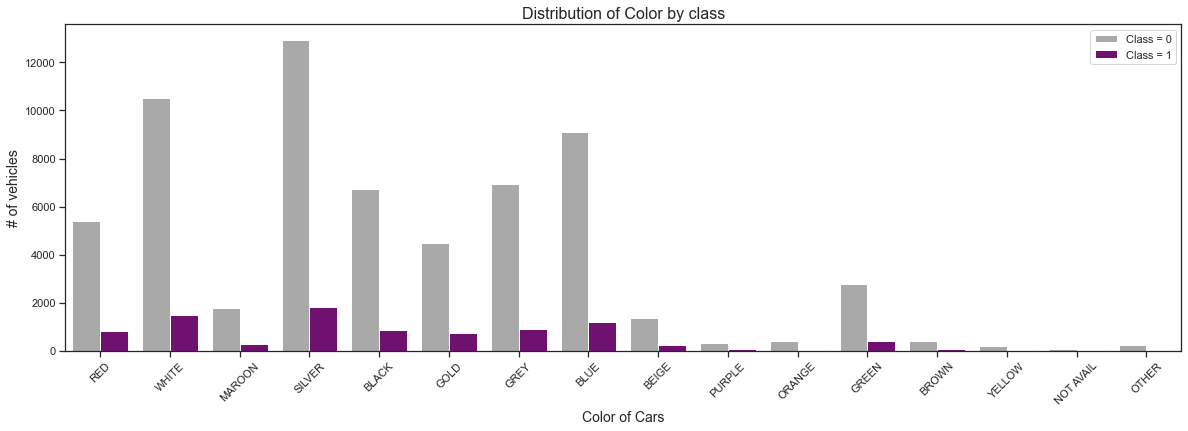

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Use countplot instead of histplot
sns.countplot(data=df, x='Color', hue='IsBadBuy', palette=['darkgrey', 'purple'], ax=ax)
ax.set_title('Distribution of Color by class', fontsize=16)
ax.set_xlabel('Color of Cars', fontsize=14)
ax.set_ylabel('# of vehicles', fontsize=14)

legend_labels = ['Class = 0', 'Class = 1']
ax.legend(labels=legend_labels)
# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

Silver and White are the most frequent colors in the data set and also per class.

In [41]:
# Take again a look at the dimension of the data set
print(f'\n Summary of data set: \n')
df.info()


 Summary of data set: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72464 entries, 0 to 72982
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IsBadBuy                    72464 non-null  int64  
 1   PurchDate                   72464 non-null  int64  
 2   Auction                     72464 non-null  object 
 3   VehicleAge                  72464 non-null  int64  
 4   Make                        72464 non-null  object 
 5   Model                       72464 non-null  object 
 6   Trim                        72464 non-null  object 
 7   SubModel                    72464 non-null  object 
 8   Color                       72464 non-null  object 
 9   Transmission                72464 non-null  object 
 10  WheelType                   72464 non-null  object 
 11  VehOdo                      72464 non-null  int64  
 12  Nationality                 72464 non-null  object 
 13  Size  

**Conclusion**

Excellent, now we have a good overview of the data. It is cleaned and ready for training. We have gained a clear understanding of why certain attributes were discarded. We have an understanding of how to deal with missing values and outliers. The last step in this notebook is to save the cleaned data set. Then you can use it for different models.

In [42]:
# Save manipulated data set to csv
df.to_csv('kick_after_EDA.csv', index=False)